In [1]:
# This code is used for plotting PCA of the varaibles between good and Bad Loans

# Load Required Libraries
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 

import seaborn as sns   # Heatmap plot
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Algorithm Models to import
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.decomposition import PCA as sklearnPCA

# All performance Metrics
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score

In [2]:
# Read Dataset csv file
rawdataset = pd.read_csv('dataset\dataset.csv')


In [3]:
# Retraining dataset with "Current" and "Late 16-30 days" as loan status
retrainingdataset = pd.DataFrame(rawdataset)
rawdataset = pd.DataFrame(rawdataset)

retrainingdataset = retrainingdataset[retrainingdataset.loan_status != 'Charged Off']
retrainingdataset = retrainingdataset[retrainingdataset.loan_status != 'Default']
retrainingdataset = retrainingdataset[retrainingdataset.loan_status != 'Fully Paid']
retrainingdataset = retrainingdataset[retrainingdataset.loan_status != 'Late (31-120 days)']

# Remove all data with "Current" and "Late 16-30 days" as loan status
rawdataset = rawdataset[rawdataset.loan_status != 'Current']
rawdataset = rawdataset[rawdataset.loan_status != 'Late (16-30 days)']

print(len(rawdataset))
print(len(retrainingdataset))

265780
604134


In [4]:
# Plotting Sub-function to display Training and Testing Set Accuracy
def plot_TrainTestAccuracy(xs, train_accuracy_list, dev_accuracy_list):
    plt.clf()
    plt.plot(xs, train_accuracy_list, label='train')
    plt.plot(xs, dev_accuracy_list, label='dev')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

def plot_PrecisionRecall(xs, dev_precision_list, dev_recall_list):
    plt.clf()
    plt.plot(xs, dev_precision_list, label='Precision')
    plt.plot(xs, dev_recall_list, label='recall')
    plt.ylabel('Precision and Recall')
    plt.legend()
    plt.show() 

def plot_AUCROCCurve(fpr,tpr,AUC):
    plt.clf()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic' + str(AUC))
    plt.legend(loc="lower right")
    plt.show()    

def plot_kscurve(fpr,tpr):    
    plt.clf()    
    plt.plot([0,1,2,3,4,5,6,7,8,9,10],np.percentile(tpr,[0,10,20,30,40,50,60,70,80,90,100]),color = 'r')
    plt.plot([0,1,2,3,4,5,6,7,8,9,10],np.percentile(fpr,[0,10,20,30,40,50,60,70,80,90,100]), color='navy', linestyle='--')
    plt.title('KS='+str(np.max(tpr - fpr)))
    plt.xlabel('quantile')
    plt.ylabel('FPR or TPR')
    plt.legend(('TPR','FPR'))
    plt.grid()    
    
# Get Error Type
def get_error_type(pred, label):
    # return the type of error: tp,fp,tn,fn
    if pred == label:
        return "tp" if pred == 1 else "tn"
    return "fp" if pred == 1 else "fn"    

# Custom function to get confusion Matrix     
def get_custom_confusionMatrix(predicted, truelabel):
    confusion_mat = np.zeros((2, 2))
    
    for k in range(0,len(predicted)):
        val = get_error_type(predicted[k], truelabel[k])
        if val == "tp":     
            confusion_mat[0][0] = confusion_mat[0][0] + 1
        elif val == "fp":     
            confusion_mat[0][1] = confusion_mat[0][1] + 1
        elif val == "fn":         
            confusion_mat[1][0] = confusion_mat[1][0] + 1
        else:
            confusion_mat[1][1] = confusion_mat[1][1] + 1
            
    return(confusion_mat)             

In [5]:
# Define Target Variable
# Fully paid or Current means 0 Rest categories as 1 (Default)
columnsTarget = ['loan_status']
subset_Target = pd.DataFrame(rawdataset,columns=columnsTarget)

label_encoder   = LabelEncoder()
integer_encoded = label_encoder.fit_transform(subset_Target)

for k in range(0,max(integer_encoded)+1):
    print("Interger Encoded:", k, label_encoder.inverse_transform(k))

TargetVar = []
for k in range(0,len(integer_encoded)):
    tempvar = 1
    if integer_encoded[k] == 2 :   # Fully Paid
        tempvar = 0
    TargetVar.append(tempvar)


C:\Users\bchandrasekaran\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Interger Encoded: 0 Charged Off
Interger Encoded: 1 Default
Interger Encoded: 2 Fully Paid
Interger Encoded: 3 Late (31-120 days)


In [6]:
# Define Target Variable
# Fully paid or Current means 0 Rest categories as 1 (Default)
columnsTarget = ['loan_status']
subset_Target = pd.DataFrame(retrainingdataset,columns=columnsTarget)

label_encoder   = LabelEncoder()
integer_encoded_retrained = label_encoder.fit_transform(subset_Target)

for k in range(0,max(integer_encoded_retrained)+1):
    print("Interger Encoded:", k, label_encoder.inverse_transform(k))
   

Interger Encoded: 0 Current
Interger Encoded: 1 Late (16-30 days)


C:\Users\bchandrasekaran\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
# Create sub-frame organized data

# Character Catergory subset
columnscharacter = ['delinq_2yrs','inq_last_6mths','total_acc','revol_bal','revol_util']   
# Conditions Cateory subset
columnscond       = ['loan_amnt','term','purpose']  # 'int_rate','grade'
# capacity Cateory subset
columnscapactity  = ['emp_length','annual_inc_merged','dti_merged']
# Collateral Category subset
columnscollateral = ['home_ownership']

# New Variables Unsorted
newvars = ['collections_12_mths_ex_med','earliest_cr_line_int']

columns_sub = columnscharacter
columns_sub.extend(columnscapactity)
columns_sub.extend(columnscollateral)
columns_sub.extend(columnscond)
columns_sub.extend(newvars)

subsetdf    = pd.DataFrame(rawdataset,columns=columns_sub)



# Fill Null Values with Mean
for col in subsetdf.columns:
    if subsetdf[col].dtype == np.float64 or subsetdf[col].dtype == np.int64 :
        if subsetdf[col].isnull().sum(axis=0) > 0 :
            meanval = subsetdf[col].mean()
            subsetdf[col] = subsetdf[col].fillna(meanval,inplace=False)

# Encode all Catrgorical Variables
subsetdf = pd.get_dummies(subsetdf,columns=['home_ownership'])
subsetdf = pd.get_dummies(subsetdf,columns=['term'])
#subsetdf = pd.get_dummies(subsetdf,columns=['grade'])
subsetdf = pd.get_dummies(subsetdf,columns=['purpose'])

# Create Normalized data frame
subsetdf_Normalized = subsetdf

# Add Target Variable
target_series = pd.Series(TargetVar)
target_series.index = subsetdf.index

# Convert dates to Months elapsed
subsetdf_Normalized['earliest_cr_line_int'] =  (subsetdf_Normalized['earliest_cr_line_int'] - 43466)/365

# Normalize Dataset (Mean and std)
for col in subsetdf_Normalized:
    if subsetdf_Normalized[col].dtype == np.float64 or subsetdf[col].dtype == np.int64 :
        meanval = np.mean(subsetdf_Normalized[col])
        stdval  = np.std(subsetdf_Normalized[col])  
        subsetdf_Normalized[col] = (subsetdf_Normalized[col] - meanval)/stdval

# Add Target Variable
target_series = pd.Series(TargetVar)
target_series.index = subsetdf_Normalized.index
subsetdf_Normalized['TARGET'] = target_series


# Add Target Variable 2
target_series = pd.Series(integer_encoded)
target_series.index = subsetdf_Normalized.index
subsetdf_Normalized['TARGET2'] = target_series     

In [12]:
# prep data for adding back to retraining (from Current and Late 16-31 days)
subsetretrain    = pd.DataFrame(retrainingdataset,columns=columns_sub)

# Fill Null Values with Mean
for col in subsetretrain.columns:
    if subsetretrain[col].dtype == np.float64 or subsetretrain[col].dtype == np.int64 :
        if subsetretrain[col].isnull().sum(axis=0) > 0 :
            meanval = subsetretrain[col].mean()
            subsetretrain[col] = subsetretrain[col].fillna(meanval,inplace=False)

# Encode all Catrgorical Variables
subsetretrain = pd.get_dummies(subsetretrain,columns=['home_ownership'])
subsetretrain = pd.get_dummies(subsetretrain,columns=['term'])
#subsetretrain = pd.get_dummies(subsetretrain,columns=['grade'])
subsetretrain = pd.get_dummies(subsetretrain,columns=['purpose'])

# Create Normalized data frame
subsetretrain_Normalized = subsetretrain

# Convert dates to Months elapsed
subsetretrain_Normalized['earliest_cr_line_int'] =  (subsetretrain_Normalized['earliest_cr_line_int'] - 43466)/365

# Normalize Dataset (Mean and std)
for col in subsetretrain_Normalized:
    if subsetretrain_Normalized[col].dtype == np.float64 or subsetretrain_Normalized[col].dtype == np.int64 :
        meanval = np.mean(subsetretrain_Normalized[col])
        stdval  = np.std(subsetretrain_Normalized[col])  
        subsetretrain_Normalized[col] = (subsetretrain_Normalized[col] - meanval)/stdval
        
# Iterate each column of Numerical data and Find Number of Null Values in 
totalcols = len(subsetretrain_Normalized)
for col in subsetretrain_Normalized.columns:
    percentageempty = subsetretrain_Normalized[col].isnull().sum(axis=0) / totalcols
    print (col,subsetretrain_Normalized[col].isnull().sum(axis=0),percentageempty)        
    
# Add Target Variable
target_series = pd.Series(integer_encoded_retrained)
target_series.index = subsetretrain_Normalized.index
subsetretrain_Normalized['TARGET'] = target_series     

delinq_2yrs 0 0.0
inq_last_6mths 0 0.0
total_acc 0 0.0
revol_bal 0 0.0
revol_util 0 0.0
emp_length 0 0.0
annual_inc_merged 0 0.0
dti_merged 0 0.0
loan_amnt 0 0.0
collections_12_mths_ex_med 0 0.0
earliest_cr_line_int 0 0.0
home_ownership_MORTGAGE 0 0.0
home_ownership_NONE 0 0.0
home_ownership_OTHER 0 0.0
home_ownership_OWN 0 0.0
home_ownership_RENT 0 0.0
term_ 36 months 0 0.0
term_ 60 months 0 0.0
purpose_car 0 0.0
purpose_credit_card 0 0.0
purpose_debt_consolidation 0 0.0
purpose_educational 0 0.0
purpose_home_improvement 0 0.0
purpose_house 0 0.0
purpose_major_purchase 0 0.0
purpose_medical 0 0.0
purpose_moving 0 0.0
purpose_other 0 0.0
purpose_renewable_energy 0 0.0
purpose_small_business 0 0.0
purpose_vacation 0 0.0
purpose_wedding 0 0.0


In [14]:
numerics = ['int32', 'int64', 'float32', 'float64']           
            
# Try PCA and Visualize datasets
subsetdf_Normalized_Numerals   =  subsetdf_Normalized.select_dtypes(include=numerics)
subsetretrain_Normalized_Numerals       =  subsetretrain_Normalized.select_dtypes(include=numerics)


y_norm_retrain   = subsetretrain_Normalized_Numerals['TARGET']
subsetretrain_Normalized_Numerals = subsetretrain_Normalized_Numerals.drop(['TARGET'],axis=1)


datasetretrain = subsetretrain_Normalized_Numerals.values
print(datasetretrain.shape)

subsetdf_Normalized_Numerals   =  subsetdf_Normalized.select_dtypes(include=numerics)
y_norm           = subsetdf_Normalized_Numerals['TARGET']
y_norm_detail    = subsetdf_Normalized_Numerals['TARGET2']


subsetdf_Normalized_Numerals = subsetdf_Normalized_Numerals.drop(['TARGET'],axis=1)
subsetdf_Normalized_Numerals = subsetdf_Normalized_Numerals.drop(['TARGET2'],axis=1)
datasettrain1 = subsetdf_Normalized_Numerals.values
print(datasettrain1.shape)




datasettrain = np.concatenate((datasettrain1,datasetretrain), axis=0)


print(datasettrain.shape)











(604134, 11)
(265780, 11)
(869914, 11)


In [15]:
sklearn_pca = sklearnPCA(n_components=3)
sklearn_pca.fit(datasettrain)

dstrain1rd  = sklearn_pca.transform(datasettrain1)
dsretrainrd = sklearn_pca.transform(datasetretrain)


y_norm, datasettrain1






(0         0
 1         1
 2         0
 3         0
 5         0
 7         0
 8         1
 9         1
 10        0
 11        0
 12        1
 13        0
 14        1
 15        0
 16        0
 17        0
 18        0
 19        0
 20        0
 21        1
 22        0
 23        0
 24        1
 25        0
 26        1
 27        1
 28        0
 29        0
 30        0
 31        0
          ..
 869729    0
 869733    0
 869737    0
 869750    0
 869766    1
 869783    1
 869784    0
 869789    1
 869798    0
 869799    0
 869803    1
 869810    1
 869811    1
 869814    0
 869815    1
 869825    1
 869838    1
 869843    1
 869857    1
 869865    1
 869867    0
 869872    1
 869880    1
 869881    0
 869882    0
 869886    1
 869899    0
 869901    0
 869904    0
 869906    1
 Name: TARGET, dtype: int64,
 array([[-0.33987661,  0.13811594, -1.36395901, ..., -1.06091557,
         -0.07874451, -1.46116734],
        [-0.33987661,  3.88502367, -1.78901892, ..., -1.36726269,
         -

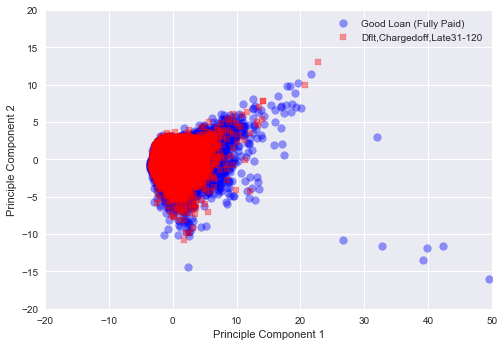

In [19]:
T1    = y_norm.ravel()
DATA2PLOT = dstrain1rd

x1 = []   # 0 
y1 = []
x2 = []   # 1
y2 = []

for k in range(0,len(T1)-1):
    if T1[k] > 0 :
        x2.append(DATA2PLOT[k,0])
        y2.append(DATA2PLOT[k,1])
    else:
        x1.append(DATA2PLOT[k,0])
        y1.append(DATA2PLOT[k,1])

        
# Current and Late (16-30 days)
x3 = [] 
y3 = []
x4= [] 
y4 = []

DATA2PLOT = dsretrainrd

T2 = y_norm_retrain.ravel()

for k in range(0,len(T2)-1):
    if T2[k] > 0 :
        x3.append(DATA2PLOT[k,0])
        y3.append(DATA2PLOT[k,1])
    else:
        x4.append(DATA2PLOT[k,0])
        y4.append(DATA2PLOT[k,1])
    
            
    

    
fig, ax = plt.subplots()
num = 1000
s = 121
ax.scatter(x1, y1, color='b', s=s/2, alpha=.4,label='Good Loan (Fully Paid)')
ax.scatter(x2, y2, color='r', s=s/3, marker='s', alpha=.4, label='Dflt,Chargedoff,Late31-120')


ax.set_xlim((-20,50))
ax.set_ylim((-20,20))

ax.set_xlabel('Principle Component 1')
ax.set_ylabel('Principle Component 2')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

plt.show()







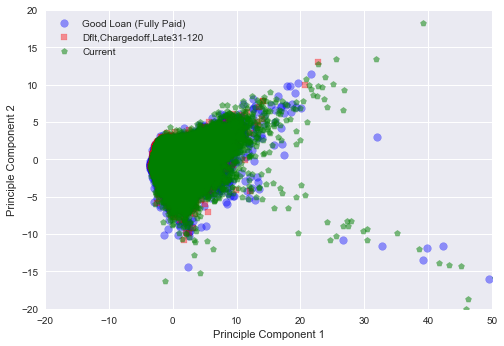

In [20]:
fig, ax = plt.subplots()

ax.scatter(x1, y1, color='b', s=s/2, alpha=.4,label='Good Loan (Fully Paid)')
ax.scatter(x2, y2, color='r', s=s/3, marker='s', alpha=.4, label='Dflt,Chargedoff,Late31-120')
ax.scatter(x4, y4, color='g', s=s/3, marker='p', alpha=.5, label='Current')

ax.set_xlim((-20,50))
ax.set_ylim((-20,20))

ax.set_xlabel('Principle Component 1')
ax.set_ylabel('Principle Component 2')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

plt.show()


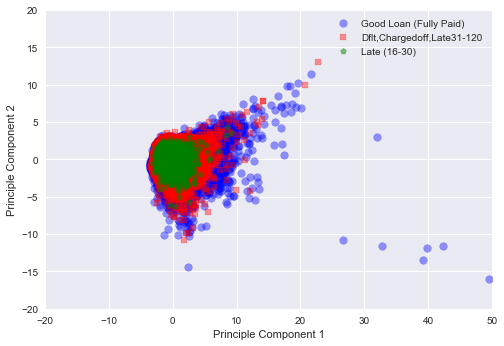

In [21]:
fig, ax = plt.subplots()

ax.scatter(x1, y1, color='b', s=s/2, alpha=.4,label='Good Loan (Fully Paid)')
ax.scatter(x2, y2, color='r', s=s/3, marker='s', alpha=.4, label='Dflt,Chargedoff,Late31-120')
ax.scatter(x3, y3, color='g', s=s/3, marker='p', alpha=.5, label='Late (16-30)')

ax.set_xlim((-20,50))
ax.set_ylim((-20,20))

ax.set_xlabel('Principle Component 1')
ax.set_ylabel('Principle Component 2')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

plt.show()